<a href="https://colab.research.google.com/github/leonardoLavagna/Drug-repurposing/blob/main/BI_LeoL_v7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set Up

Before anything else remeber to:


1.   When using Google Colab collect all the needed files inside the folder BI-Data in your Google Drive.
2.   When using colab upload the auxiliary functions in the 'content' directory.



In [1]:
# ASSIGN colab = True WHEN USING GOOGLE COLAB

import os
colab=True
if colab:
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
    os.chdir('/content/drive/MyDrive/BI-Data/')

Mounted at /content/drive


In [2]:
!git clone https://github.com/dinaghiassian/DIAMOnD DiaBLE
!git clone https://github.com/dinaghiassian/DIAMOnD

fatal: destination path 'DiaBLE' already exists and is not an empty directory.
fatal: destination path 'DIAMOnD' already exists and is not an empty directory.


In [3]:
#https://github.com/GuyAllard/markov_clustering
%pip install markov_clustering 
%pip install networkx --upgrade
%pip install scipy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 45.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


In [4]:
# DIRECTORY TREE
# Change according to your file system
# This path should be the same used in the auxiliary_funtions module
# Remark . When using Google Colab remember that the path as been changed to 
# /content/drive/MyDrive/BI-Data/ 

path = '/content/drive/MyDrive/BI-Data/'

### Libraries

In [5]:
import re
import csv
import random
import json
import ast
import sys
import statistics
import auxiliary_functions as AF
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import markov_clustering as mc
from tqdm import tqdm
from scipy.stats import hypergeom
from sklearn.model_selection import train_test_split

In [ ]:
!ls

 auxiliary_functions.py
 BIOGRID-ORGANISM-Homo_sapiens-4.4.204.tab3.txt
 cross_0.txt
 cross_1.txt
 cross_2.txt
 cross_3.txt
 cross_4.txt
 curated_gene_disease_associations.tsv
 DiaBLE
 DIAMOnD
 DIAMOnD.py
'Hypertensive disease_seed_gene.txt'
'Hypertensive disease_splits.json'
 PPI.adjlist
 PPI_Hypertensive.txt
 __pycache__
 seed_gene.txt


## TASK 1 . PPI and GDA data gathering and interactome reconstruction

### Data gathering and interactome reconstruction

In [148]:
# DATA GATHERING AND PROCESSING

HSN = AF.interactome_processing(path+"BIOGRID-ORGANISM-Homo_sapiens-4.4.204.tab3.txt")
DGA_all = pd.read_csv(path+'curated_gene_disease_associations.tsv',sep='\t')
DGA =  DGA_all[DGA_all['diseaseName'] == 'Hypertensive disease']
#DGA = AF.DGA_processing(path+'curated_gene_disease_associations.tsv', 'Hypertensive disease')
DG_in_PPI,splits = AF.make_seeds_splits(DGA,HSN,'Hypertensive disease',path)
DG_in_PPI, splits = AF.import_seeds_split('Hypertensive disease',path)

Processing interactome...


<ipython-input-148-0276e00f16e4>:3: DtypeWarning: Columns (1,2,18) have mixed types.Specify dtype option on import or set low_memory=False.
  HSN = AF.interactome_processing(path+"BIOGRID-ORGANISM-Homo_sapiens-4.4.204.tab3.txt")


# Process completed.
Creating seed gene splits...
Number of genes in disease PPI:  290
# Process completed.
Importing seed genes...
# Process completed.


### Compute the disease LCC and its basic network measures

In [7]:
# LCC COMPUTATION

LCC = AF.extract_LCC_form_PPI(HSN)
n_nodes = LCC.number_of_nodes()

Extracting LCC...
Nodes  19618 , Connections  665061
# Process completed.


Creating Disease LCC graph...
Nodes in disease LCC  232
# Process completed.


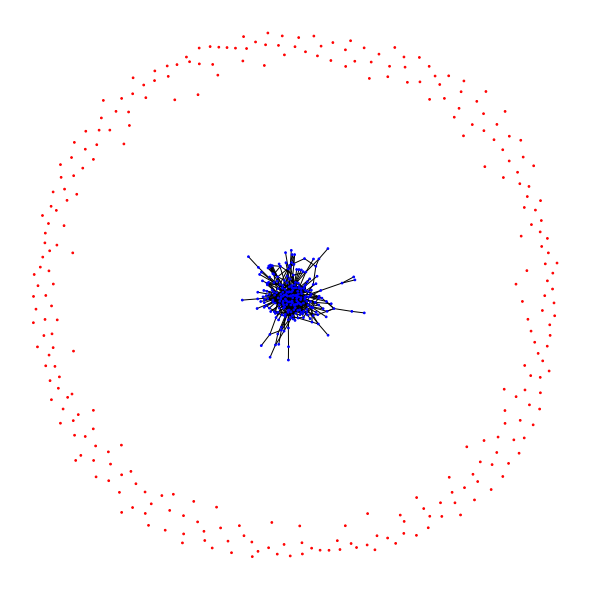

In [8]:
# LCC PLOT

DN = AF.make_disease_graph(HSN, DGA, DG_in_PPI)
AF.plot_LCC(DN, DG_in_PPI)

## Task 2 . Putative disease genes identification algorithms

### DIAMOnD algorithm

In [85]:
# SET UP
import ast

#dict with pair k,v where k is the index and v is the list of genes in the probe set
with open(path+'Hypertensive disease_splits.json') as f:
  dict_ = json.load(f)

with open(path+'Hypertensive disease_seed_gene.txt') as f:
  data = f.read()
  seeds = ast.literal_eval(data)
  seeds = np.asarray(seeds)

dict_.items()
type(dict_)
print(len(dict_["0"]))

58


In [126]:
# CROSS VALIDATION SPLITS INTO FILES

# 58 is the probe set v
#290-58 has to be the training set l
for k,v in dict_.items():
    print(k,v)

    with open(path+'probeset_{}.txt'.format(k),'w') as f:
        for item in v:
            f.write("%s," % item)   

    l=list(set(seeds).difference(set(v))) #l is 232, it seems right!
    print("len of l",len(l))
 
    with open(path+'cross_{}.txt'.format(k),'w') as f:
        for item in l:
            f.write("%s\n" % item)
    

0 ['SLC6A2', 'NPTN', 'RALBP1', 'IGF1', 'CEP164', 'KLK1', 'B2M', 'HTR2B', 'SLC12A2', 'EDN1', 'APOA1', 'CACNA1D', 'TNFRSF11B', 'F11', 'CXCL2', 'ABCB6', 'ADRB1', 'SMAD4', 'NPPA', 'TGFB1', 'ND5', 'TPM1', 'OXT', 'PROC', 'UCP2', 'VAV3', 'SDCCAG8', 'EDNRA', 'NPHP1', 'ACT', 'CRP', 'CLCNKA', 'AHR', 'COX1', 'CAT', 'ALB', 'COX3', 'COL4A3', 'MMP9', 'ATOX1', 'ENPP1', 'MYH9', 'STK39', 'IL6', 'LEP', 'PLAT', 'PRKACA', 'APOE', 'GCG', 'GPX1', 'BBS1', 'TGFBR1', 'HMOX1', 'SCNN1A', 'PDE8B', 'PTH', 'AVP', 'RPS6KB1']
len of l 232
1 ['ACE', 'MTOR', 'AR', 'JAK2', 'GLP1R', 'LHB', 'LDLRAP1', 'REN', 'ERCC6', 'LPL', 'PLG', 'BBS4', 'MKKS', 'SLC12A3', 'IKBKAP', 'COL1A1', 'TRNE', 'HP', 'GSTT2', 'TRPC5', 'NR3C2', 'ECE1', 'FOXE3', 'LEPR', 'SOD3', 'CACNA2D1', 'TIMP1', 'AIP', 'FOS', 'UTS2', 'PAX2', 'ADRA2A', 'AGTR2', 'EGFR', 'ADD1', 'MMP2', 'DRD2', 'SELP', 'GJC1', 'MAFB', 'VCAM1', 'VWF', 'TRH', 'EDN3', 'LYZ', 'CRHR2', 'PRKAR1A', 'GJA5', 'BCL2', 'VDR', 'WT1', 'CYP21A2', 'HMBS', 'ORAI1', 'RGS2', 'TP53', 'CYP11B1', 'RET']
l

In [155]:
# EXECUTE DIAMOND
# Remark . The output file is saved in the current directory. 
# That is in '/content/drive/MyDrive/BI-Data/'

!python3  DIAMOnD.py  PPI_Hypertensive.txt  cross_1.txt  200 "res0.txt"


 results have been saved to 'res0.txt' 



### Validation

Now we are going to test the model, therefore we extract the training set and see how many nodes we retrieve of the probe set using a 5 cross validation

#### Evaluation of performances

In [ ]:
alg_name = "DIAMOnD"
tot = 200
!python3  DIAMOnD.py  PPI_Hypertensive.txt  cross_0.txt  200 "res0.txt"
m = evaluation(tot, 58, alg_name,0)
print(m)

!python3  DIAMOnD.py  PPI_Hypertensive.txt  cross_1.txt  200 "res1.txt"
m = evaluation(tot, 58, alg_name,1)
print(m)

!python3  DIAMOnD.py  PPI_Hypertensive.txt  cross_2.txt  200 "res2.txt"
m = evaluation(tot, 58, alg_name,2)  
print(m)


!python3  DIAMOnD.py  PPI_Hypertensive.txt  cross_3.txt  200 "res3.txt"
m = evaluation(tot, 58, alg_name,3)  
print(m)


!python3  DIAMOnD.py  PPI_Hypertensive.txt  cross_4.txt  200 "res4.txt"
m = evaluation(tot, 58, alg_name,4)  
print(m)



In [197]:

def evaluation(top_n, cval, alg_name,k):
    recalls, precs, f1s, ndcg_scores = ([] for _ in range(4))

    cv = pd.read_csv('res{}.txt'.format(k),sep='\t')
    cv_nodes = cv[alg_name + '_node'].tolist()

    
    with open(path+'probeset_{}.txt'.format(k)) as f:
          probeset = f.read().split(",")
          probeset=set(probeset)
          probeset.remove("")  

    # Subsetting
    top = set(cv_nodes[0:top_n]) 
    

    
    # Intersecting with the probe set  
    inters = top.intersection(probeset) 
    print(inters)

    # Appending the results
    recall = round(len(inters)/cval, 3)
    prec = round(len(inters)/top_n, 3)
    recalls.append(recall)
    precs.append(prec)

    try:
      f1s.append(round(2*((recall*prec)/(recall+prec)), 3))
    except:
      f1s.append(0)

    return {'recall': recalls, 
            'precision': precs, 
            'F1 Score': f1s, }